# What is the Daimond ?
It's a precious stone consisting of a clear and colourless crystalline form of pure carbon, the hardest naturally occurring substance.

# Factors That Determine The Price Of Loose Diamonds


Dataset contains information on 53940 diamonds. According to some characteristics we will predict the cost.

1.Carat Weight

Carat size has the biggest impact on the price of loose diamonds. This may be the first question you ask yourself when trying to determine how much money you want to spend on the diamond.

2.Cut

Cut refers to how the facets and angles of a diamond work together to reflect light. Cut has the single biggest impact on the sparkle, brightness and the beauty of a diamond. A well cut diamond is desirable and valuable when it has that distinctive and tremendous light return, aka sparkle and fire.

3.Color

Color refers to how white, or "colorless," the diamond appears. The better the color, the more rare and more expensive that diamond will be.

4.Clarity

Clarity is a measure of how many imperfections are in the diamond, like dark spots, gas bubbles, white spots, cracks, or cloudiness. The cleaner a diamond is (the less imperfections), the rarer it is and the more it will cost even if the imperfections are barely visible to the naked eye.

5.Shape

A diamond's shape can impact that price of a loose diamond.

6.Table Width

If the table (upper flat facet) is too large then light will not play off of any of the crown's angles or facets and will not create the sparkly rainbow colors that are so beautiful in diamonds because it will all simply escape from the top center. If it is too small then the light will get trapped and that attention grabbing shaft of light will never come out but will “leak” from other places in the diamond.

7.Depth

If a diamond's depth percentage is too large or small the diamond will become dark in appearance because it will no longer return an attractive amount of light.







# Why the problem need to be solved

The price of the diamond is hard to figure for normal buyer as it depends on many factors you can see two diamonds with ths same weight(carat) but stil very diffferent on price scale .
" Take a look at this diamond from Amazon https://www.amazon.com/gp/product/B072L343M2/ref=as_li_qf_asin_il_tl?ie=UTF8&tag=thediamondpro-20&creative=9325&linkCode=as2&creativeASIN=B072L343M2&linkId=b169c65833f9b1074b4c82cb125f7e58 and then take a look this diamond from Blue Nile.
https://www.bluenile.com/diamond-details/LD09889381?click_id=962062758
They’re both one carat diamonds. Does it make sense that they’re the same size, yet one costs 1,179 and the other 16,500? To make it even crazier, the Blue Nile diamond may actually be a better value!" 
To avoid being scammed or failed to have a good baragain, a good price prediction may come in handy

# Our target variable is dollar value of a diamond 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy
from statsmodels.stats.weightstats import *

from sklearn.linear_model import RidgeCV, Ridge, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelBinarizer, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, make_scorer
from xgboost import XGBClassifier
from hyperopt import fmin,tpe, hp, STATUS_OK, Trials
# is a Python library for optimizing over awkward search spaces with real-valued, discrete, and conditional dimensions.
import xgboost as xgb
from sklearn.model_selection import learning_curve, validation_curve
%matplotlib inline
import warnings
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)

In [2]:
diamonds_df = pd.read_csv('diamonds.csv')
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamonds_df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
real_features = ['carat', 'depth', 'table', 'x', 'y', 'z','price']

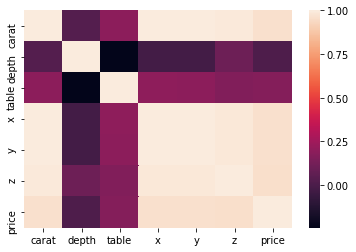

In [6]:
sns.heatmap(diamonds_df[real_features].corr(method='spearman'));


The features of carat, x, y, z (x length in mm (0--10.74),y width in mm (0--58.9),z depth in mm (0--31.8))
have a large correlation, both among themselves and with the target variable, which is not surprising. At the same time, the correlation of the target variable and the fatures of depth, table is almost absent.

# Analysis of categorical features

In [7]:
cat_features = ['cut','color','clarity']

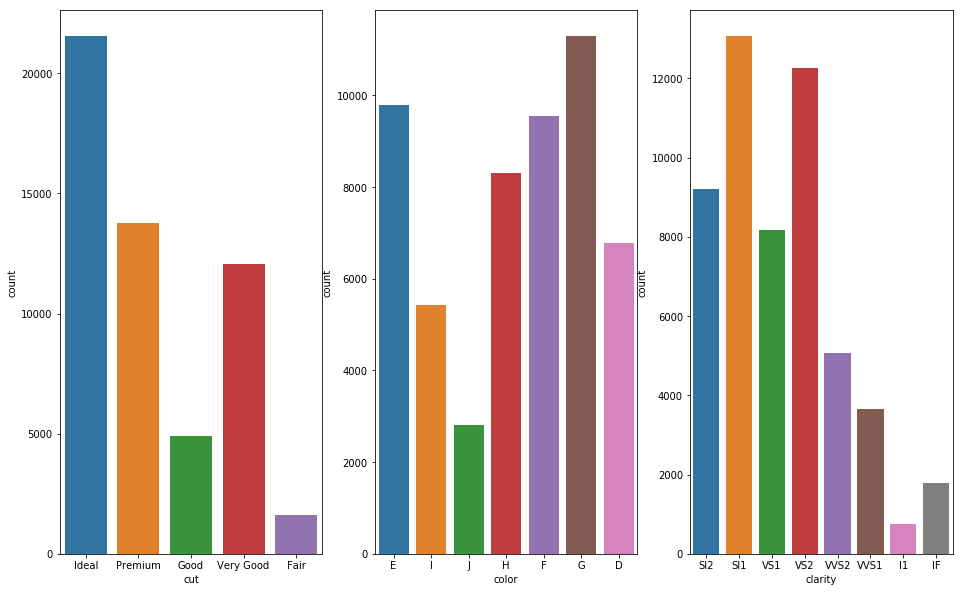

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 10))

for idx, feature in enumerate(cat_features):
    sns.countplot(diamonds_df[feature], ax=axes[idx % 3], label=feature)


Real values ​​of categorical faetures do not differ from those stated in the description. In addition, it is clear that there are not many unique values, so the One Hot encoding should work fine.

# Analysis of Target Variable 

/Users/Hakob/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/Hakob/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


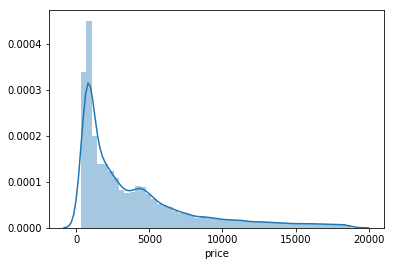

In [9]:
sns.distplot(diamonds_df['price'])


The distribution has a heavy right tail. Let's apply logarithm.

This mathematical function helps user to calculate natural logarithmic value of x+1 where x belongs to all the input array elements.

/Users/Hakob/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


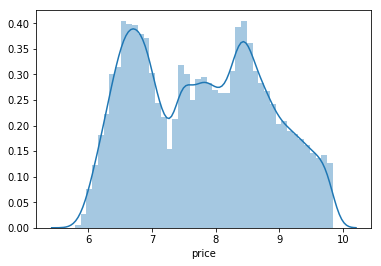

In [10]:
sns.distplot(diamonds_df['price'].map(np.log1p))

It did not help much: it turned out a bimodal distribution(In statistics, a bimodal distribution is a continuous probability distribution with two different modes. These appear as distinct peaks (local maxima) in the probability density function, as shown in Figures 1 and 2). But the tail disappeared . For clarity, we generates a probability plot of sample data against the quantiles of a specified theoretical distribution (the normal distribution by default). probplot optionally calculates a best-fit line for the data .

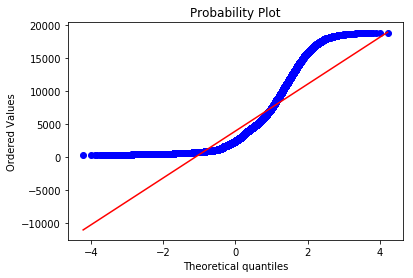

In [11]:
stats.probplot(diamonds_df['price'], dist="norm", plot=plt);


# findings

The features (carat, depth, table, x, y, z) are scalable

For categorical features ('cut', 'color', 'clarity') ww will apply one hot encoding

The target variable is logarithmic

# Primary visual analysis 

/Users/Hakob/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/Hakob/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/Hakob/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/Hakob/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternat

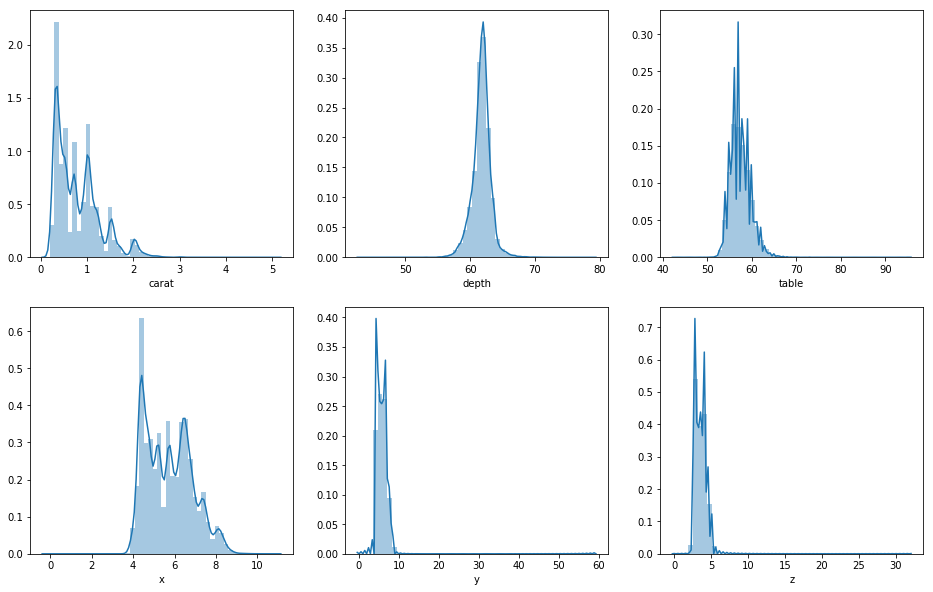

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

for idx, feature in enumerate(real_features[:-1]):
    sns.distplot(diamonds_df[feature], ax=axes[idx // 3, idx % 3], label=feature)

The distribution  of depth, table, y, z is remote, but resembles a bell. In depth, tails are heavy for normal distribution; carat and table are rather bimodal. In addition, they have heavy right tails,applying  np.log1p wouldn’t  hurt .

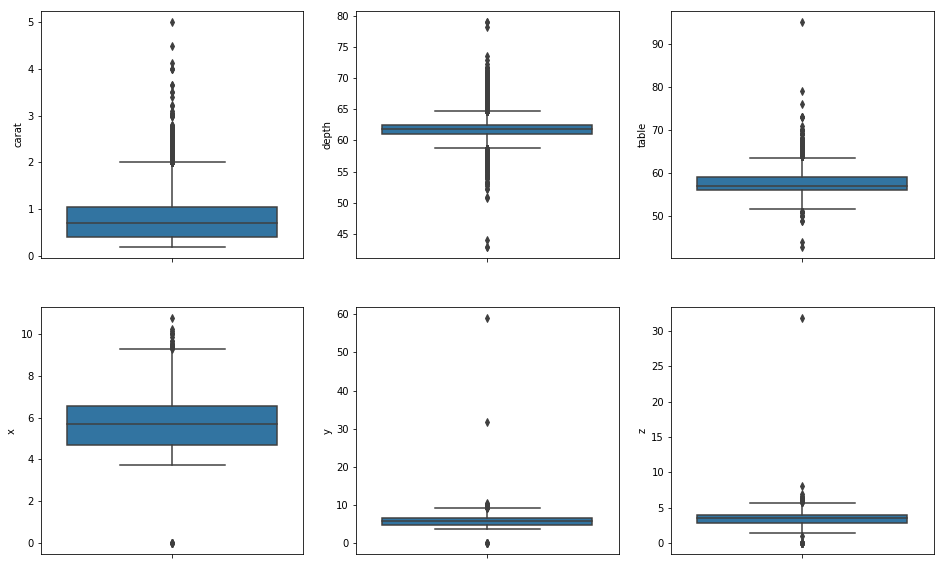

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

for idx, feature in enumerate(real_features[:-1]): #price рисовать не будем
    sns.boxplot(diamonds_df[feature], ax=axes[idx // 3, idx % 3], orient='v')


There are no serious anomalies in the data under consideration. Just in case, let's look at a diamond with y = 60, z = 32 and carat> 4. If it is expensive, then we will not consider it as an ejection.

In [14]:
diamonds_df[diamonds_df['y'] > 55].head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
24067,24068,2.0,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06


In [15]:
diamonds_df[diamonds_df['z'] > 30].head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
48410,48411,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8


In [16]:
diamonds_df[diamonds_df['carat'] > 4].head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
25998,25999,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,26000,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
27130,27131,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
27415,27416,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,27631,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72


looks like that these are just very expensive stones as suspected


Let us see how the considered features are interrelated with the target variable

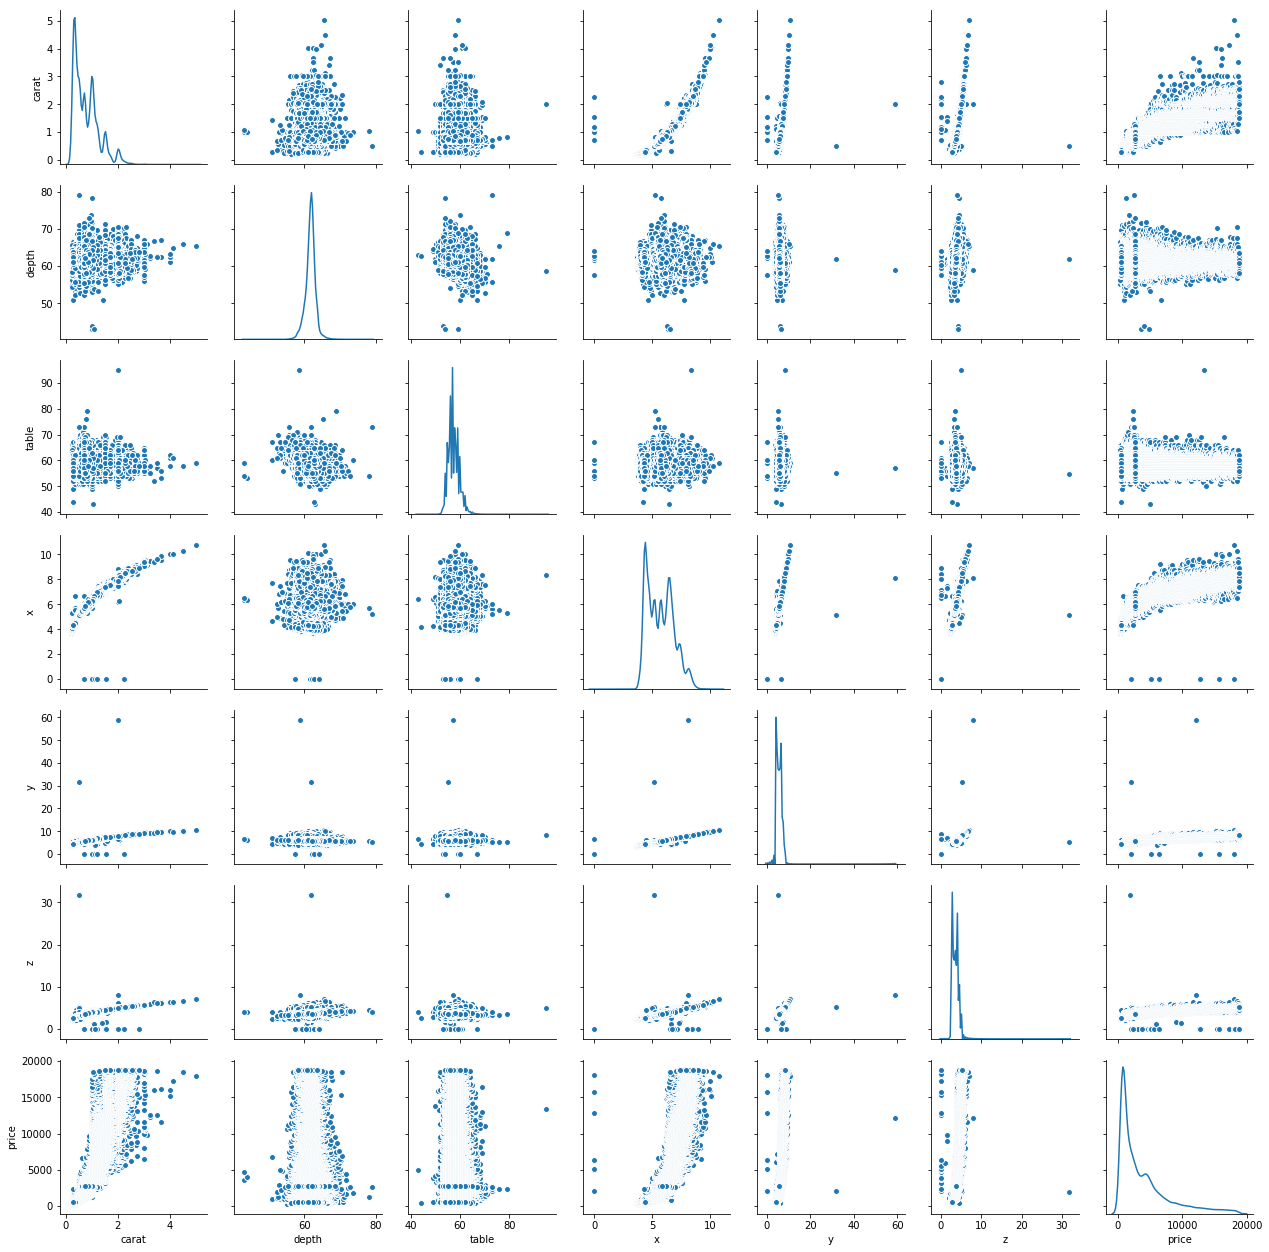

In [17]:
sns.pairplot(diamonds_df[real_features], diag_kind="kde")

the weight of a diamond shows a strong dependence on its size

depth and table are not interconnected with the rest of the features, including the target

x, y, z is linearly related

price linearly depends on size

the relationship between price and weight can hardly be called linear, but the monotonous trend is noticeable



# Analysis of categorical features

Let's see how the target variable depends on categorical attributes.

/Users/Hakob/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Hakob/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/Hakob/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/Hakob/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'de

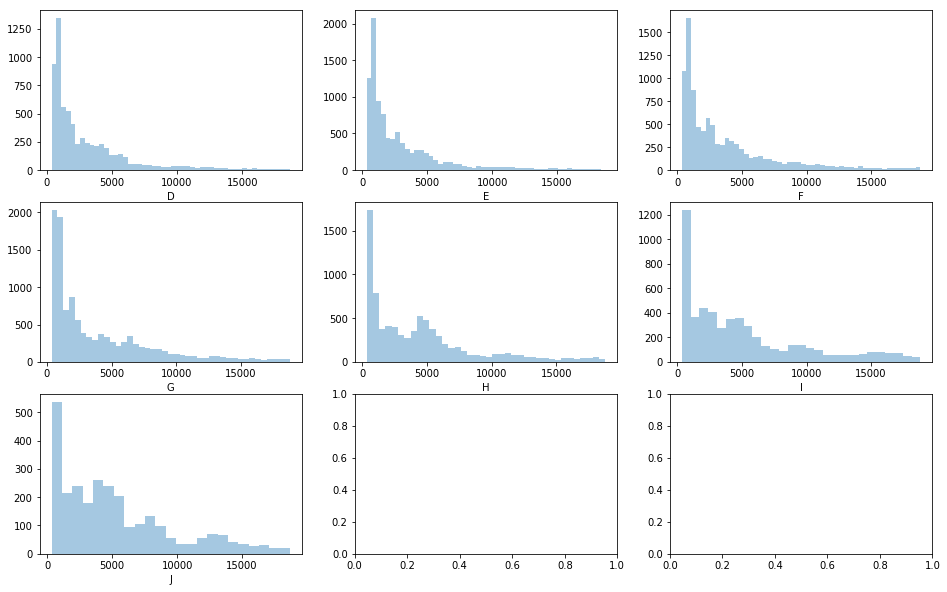

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

for idx, (color, sub_df) in  enumerate(pd.groupby(diamonds_df, 'color')): 
    ax = sns.distplot(sub_df['price'], kde=False,  ax=axes[idx // 3, idx % 3])
    ax.set(xlabel=color)

Distributions for all color values ​​have a heavy right tail and do not differ much from each other.

/Users/Hakob/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Hakob/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/Hakob/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/Hakob/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'de

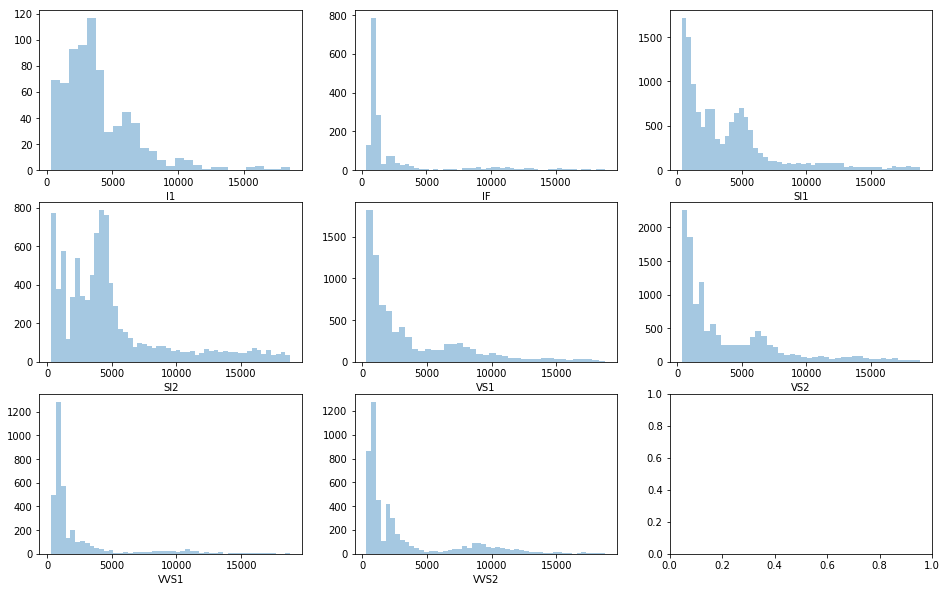

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

for idx, (clarity, sub_df) in  enumerate(pd.groupby(diamonds_df, 'clarity')): 
    ax = sns.distplot(sub_df['price'], kde=False,  ax=axes[idx // 3, idx % 3])
    ax.set(xlabel=clarity)

All tails are heavy, but at SI1, SI2 there are additional peaks in the region of 5000.



/Users/Hakob/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Hakob/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/Hakob/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/Hakob/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'de

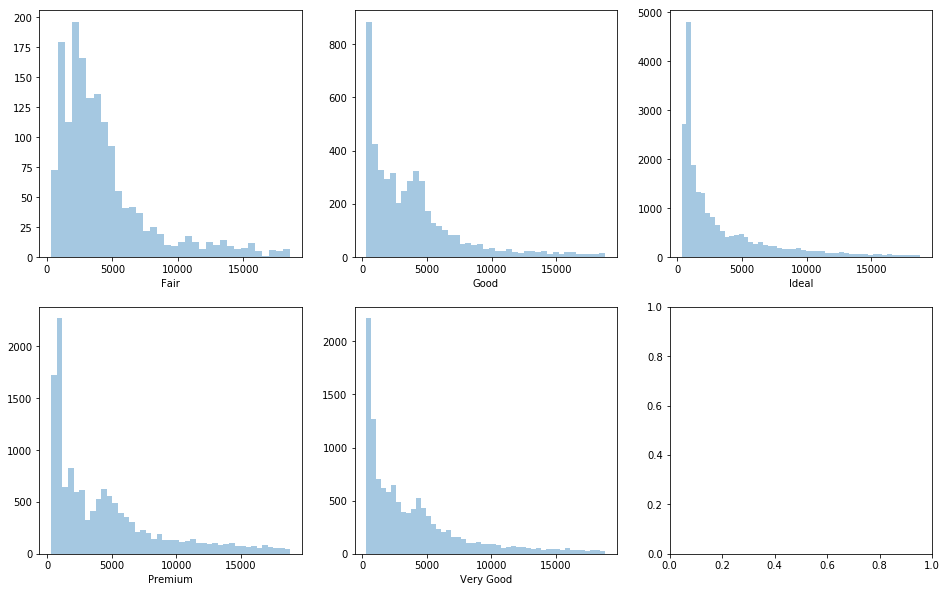

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

for idx, (cut, sub_df) in  enumerate(pd.groupby(diamonds_df, 'cut')): 
    ax = sns.distplot(sub_df['price'], kde=False,  ax=axes[idx // 3, idx % 3])
    ax.set(xlabel=cut)

And again peaks around 5000 (at Good and Premium). But in general, the graphics are similar.


ploting a boxplots for each varible .

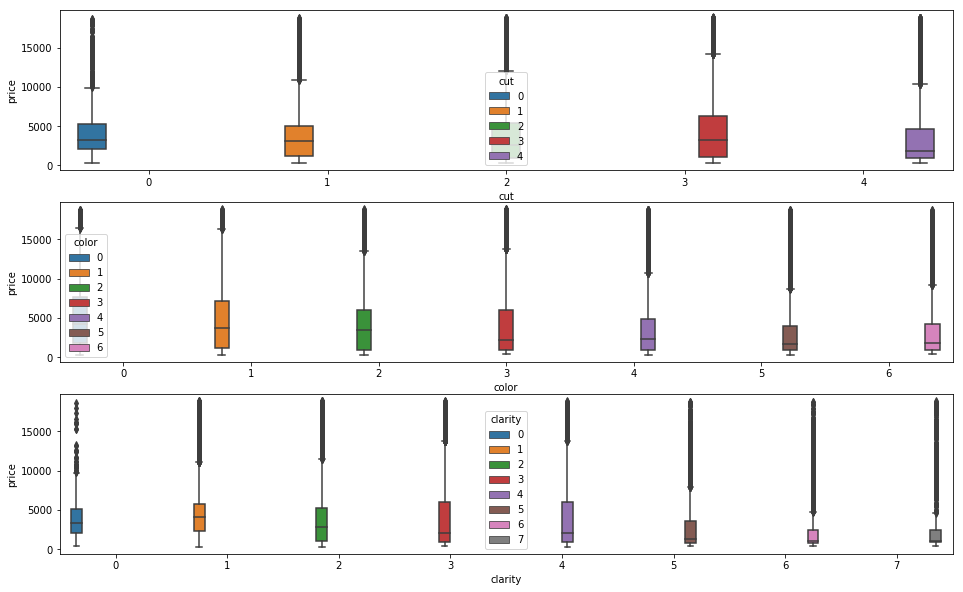

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 10))


df = diamonds_df.copy()
df['color'] = df['color'].map({'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6})
df['clarity'] = df['clarity'].map({'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7 })
df['cut'] = df['cut'].map({'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4})

for idx, feature in enumerate(cat_features):
    sns.boxplot(x=feature, y='price',data=df,hue=feature,  ax=axes[idx])


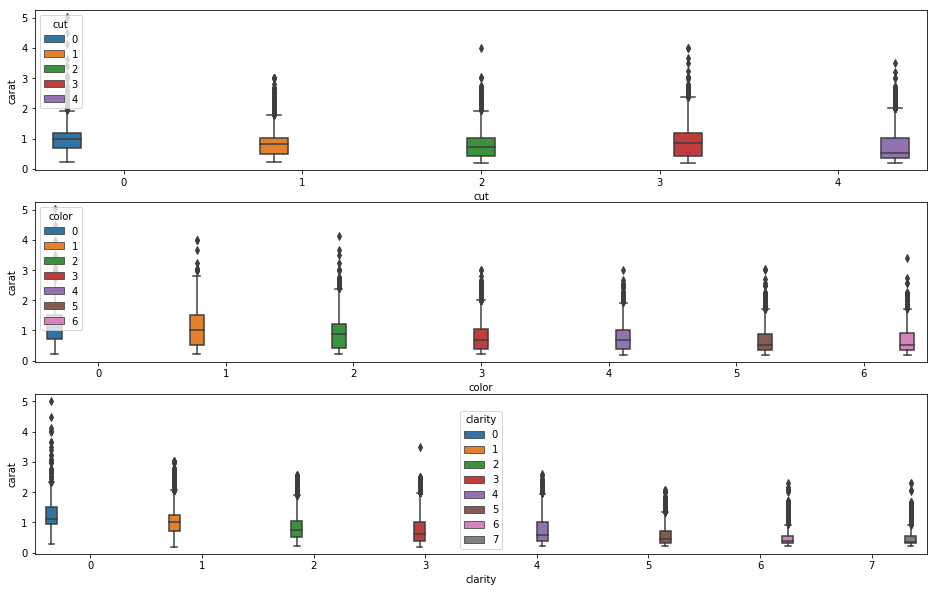

In [22]:

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 10))

for idx, feature in enumerate(cat_features):
    sns.boxplot(x=feature, y='carat',data=df,hue=feature,  ax=axes[idx])


It's more interesting here. Let's start with the cut. It can be seen that the median is maximum for Very Good and Premium. For ideal, the median price is much less. Similar observations can be made for color and clarity. Perhaps, diamonds with the best properties are not very large, and, accordingly, their price is lower. lets Check it out.

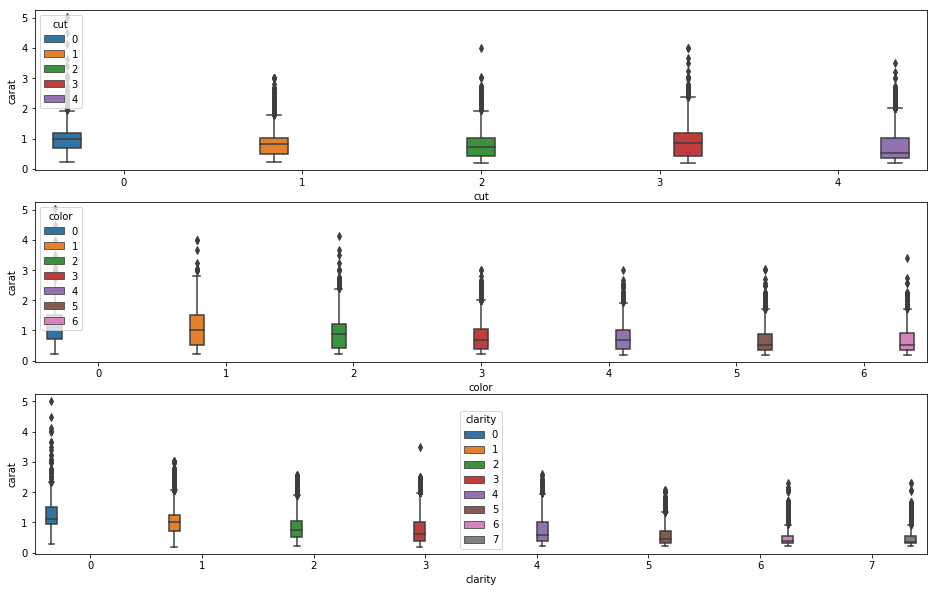

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 10))

for idx, feature in enumerate(cat_features):
    sns.boxplot(x=feature, y='carat',data=df,hue=feature,  ax=axes[idx])

Indeed, the median weight for diamonds with very good characteristics is less than for diamonds with bad characteristics. Finally, let's see how many diamonds with a particular characteristic are present in the data

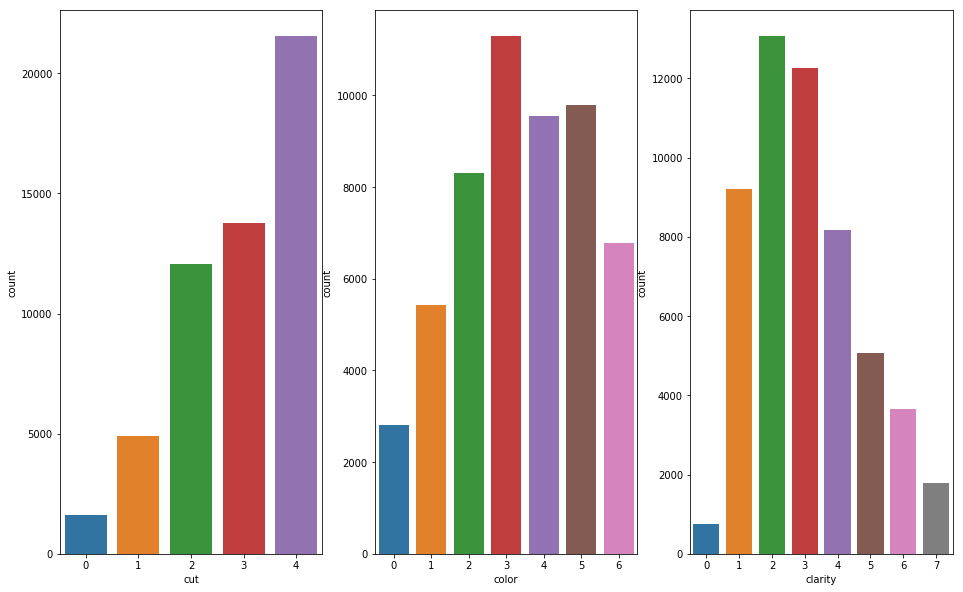

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 10))

for idx, feature in enumerate(cat_features):
    sns.countplot(df[feature], ax=axes[idx % 3], label=feature)



It is seen that there are very few stones with poor cutting. There are also few stones with bad color characteristics. But not very much with the ideal. The distribution of the purity of the stone resembles the Laplace distribution.
In probability theory and statistics, the Laplace distribution is a continuous probability distribution 

https://en.wikipedia.org/wiki/Laplace_distribution

# The main takeaways are 

Key features to predict: the weight and size of the diamond (carat, x, y, z). The graphs show that there is a monotonous dependence of these features and prices. What is logical.

Features of depth and table have almost no effect on the cost of the stone

Exclusively by categorical features it is difficult to say anything about the target variable. However, it is clear that the better a diamond is in terms of these attributes, the more likely it is that it will not be very large.

No data is missing 

Since the target variable has a very heavy right tail, we will use the mean absolute error as the metric, and not the quadratic one.

It can be seen that the dependence on key features is close to linear. Therefore, we will use linear regression as a baseline.

Moreover, there are not so many features, so we will also consider a random forest and gradient boosting. It  will be interesting  to compeer random with XG boosting.


# Data preprocessing

In [25]:
X = diamonds_df.drop(['price'], axis=1).values[:,1:] 
y = diamonds_df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=4444, shuffle=True)

In [26]:
label_bin = LabelBinarizer()
# featureswith indices 1,2,3 categorical.we wil  apply OHE to them
X_train_cut_ohe = label_bin.fit_transform(X_train[:,1])
X_test_cut_ohe = label_bin.transform(X_test[:,1])
                            
X_train_color_ohe = label_bin.fit_transform(X_train[:,2])
X_test_color_ohe = label_bin.transform(X_test[:,2])
                                                    
X_train_clarity_ohe = label_bin.fit_transform(X_train[:,3])
X_test_clarity_ohe = label_bin.transform(X_test[:,3])  

# carat, x and the target variable is logarithmized

log_vect = np.vectorize(np.log1p)
X_train_сarat_log = log_vect(X_train[:,0]).reshape(-1,1)
X_test_сarat_log  = log_vect(X_test[:,0]).reshape(-1,1)
X_train_x_log = log_vect(X_train[:,6]).reshape(-1,1)
X_test_x_log  = log_vect(X_test[:,6]).reshape(-1,1)
y_train_log = log_vect(y_train)
y_test_log = log_vect(y_test)

# scalabling subtatial features 
scaler = StandardScaler()
X_train_real = np.hstack((X_train_сarat_log, X_train_x_log, X_train[:,[7,8,4,5]]))
X_test_real = np.hstack((X_test_сarat_log, X_test_x_log, X_test[:,[7,8,4,5]]))
X_train_real_scaled = scaler.fit_transform(X_train_real)
X_test_real_scaled = scaler.transform(X_test_real)

# As additional features, we will consider polynomial features.
#These attributes should improve the quality of the linear model.

X_train_additional = PolynomialFeatures().fit_transform(X_train_real)
X_test_additional = PolynomialFeatures().fit_transform(X_test_real)
X_train_additional_scaled = scaler.fit_transform(X_train_additional)
X_test_additional_scaled = scaler.transform(X_test_additional)



# Combine all transformed feature
X_train_transformed = np.hstack((X_train_real_scaled,X_train_cut_ohe, X_train_color_ohe, X_train_clarity_ohe))
X_test_transformed = np.hstack((X_test_real_scaled,X_test_cut_ohe, X_test_color_ohe, X_test_clarity_ohe))

/Users/Hakob/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Hakob/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Hakob/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Cross-validation, selection of parameters

We first consider the linear model. The data is divided into 5 folds. With the help of RidgeCV and LassoCV we will optimize the regularization force.

In [27]:
def mean_absolute_exp_error(model, X,y):
    return -mean_absolute_error(np.expm1(model.predict(X)), np.expm1(y))


In [28]:
cv = KFold(n_splits=5, shuffle=True, random_state=4444)
alphas = np.logspace(-5,2,100)
ridge_cv = RidgeCV(alphas=alphas, scoring=mean_absolute_exp_error, cv=cv)
lasso_cv = LassoCV(alphas=alphas, cv=cv, random_state=4444)

In [29]:
ridge_cv.fit(X_train_transformed, y_train_log)
lasso_cv.fit(X_train_transformed, y_train_log)
print('Optimized alpha: Ridge = %f, Lasso = %f' % (ridge_cv.alpha_, lasso_cv.alpha_))
score_ridge = mean_absolute_error(y_test, np.expm1(ridge_cv.predict(X_test_transformed)))
score_lasso = mean_absolute_error(y_test, np.expm1(lasso_cv.predict(X_test_transformed)))
print('Ridge regression score = %f' % score_ridge)
print('Lasso regression score = %f' % score_lasso)


Optimized alpha: Ridge = 0.000010, Lasso = 0.000221
Ridge regression score = 588.854813
Lasso regression score = 589.599115


Both methods showed a similar result. What happens if we add new features?

In [30]:
X_train_transformed_add = np.hstack((X_train_transformed, X_train_additional_scaled))
X_test_transformed_add = np.hstack((X_test_transformed, X_test_additional_scaled))
ridge_cv.fit(X_train_transformed_add, y_train_log)
lasso_cv.fit(X_train_transformed_add, y_train_log)
print('Optimized alpha: Ridge = %f, Lasso = %f' % (ridge_cv.alpha_, lasso_cv.alpha_))
score_ridge = mean_absolute_error(y_test, np.expm1(ridge_cv.predict(X_test_transformed_add)))
score_lasso = mean_absolute_error(y_test, np.expm1(lasso_cv.predict(X_test_transformed_add)))
print('Ridge regression score = %f' % score_ridge)
print('Lasso regression score = %f' % score_lasso)


/Users/Hakob/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Hakob/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Hakob/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Hakob/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Users/Hakob/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Hakob/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Hakob/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Hakob/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Users/Hakob/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Hakob/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Hakob/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Hakob/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

Optimized alpha: Ridge = 52.140083, Lasso = 0.000135
Ridge regression score = 385.308688
Lasso regression score = 387.274454


/Users/Hakob/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


The error has decreased significantly.
Construct validation and learning curves

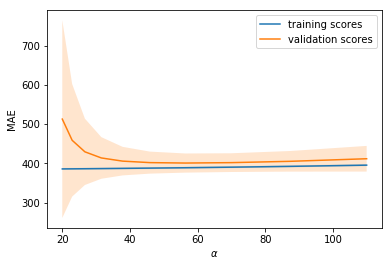

In [31]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
    facecolor=lines[0].get_color(), alpha=0.2)

model = Ridge(random_state=4444) 
alphas = np.logspace(1,2,10) + 10 #If the regularization coefficient is small, then the values are obtained in subunit
val_train, val_test = validation_curve(model, X_train_transformed_add, y_train_log,'alpha', alphas, cv=cv,scoring=mean_absolute_exp_error)
plot_with_err(alphas, -val_train, label='training scores')
plot_with_err(alphas, -val_test, label='validation scores')
plt.xlabel(r'$\alpha$'); plt.ylabel('MAE')
plt.legend();

Judging by the validation curves, the model learning rate is not good,  errors lie close to each other.

In [32]:
def plot_learning_curve(model, X,y):
    train_sizes = np.linspace(0.05, 1, 20)
      
    N_train, val_train, val_test = learning_curve(model,X, y, train_sizes=train_sizes, cv=5,scoring=mean_absolute_exp_error, random_state=4444)
    plot_with_err(N_train, -val_train, label='training scores')
    plot_with_err(N_train, -val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('MAE')
    plt.legend()


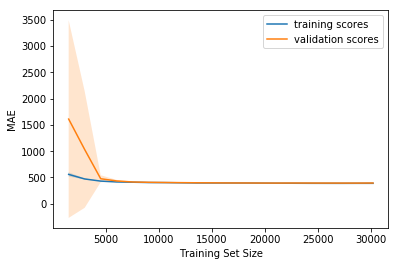

In [33]:
model = Ridge(alpha=52.140083,random_state=4444)
plot_learning_curve(model, X_train_transformed_add, y_train_log)

The curves lie close to each other from the very beginning. Conclusion: we have enough observations, but our model is simple we need to move towards complicating the model

# Random forest
A random forest should work well 

CPU times: user 23min 35s, sys: 17.8 s, total: 23min 53s
Wall time: 23min 53s


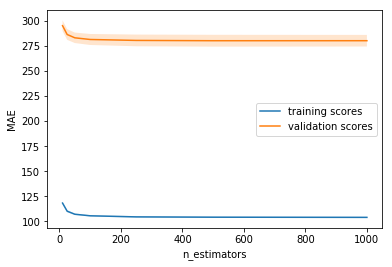

In [34]:
%%time
model = RandomForestRegressor(n_estimators=100, random_state=4444)
n_estimators = [10,25,50,100,250,500,1000]
val_train, val_test = validation_curve(model, X_train_transformed, y_train_log,'n_estimators', n_estimators, cv=cv,scoring=mean_absolute_exp_error)
    
plot_with_err(n_estimators, -val_train, label='training scores')
plot_with_err(n_estimators, -val_test, label='validation scores')
plt.xlabel('n_estimators'); plt.ylabel('MAE')
plt.legend();

looks like from 200 trees mark the quality is unchanged. Therefore, as for our another model, we will consider a random forest with just such a number of trees.

In [35]:
forest_model = RandomForestRegressor(n_estimators=200, random_state=4444)
forest_model.fit(X_train_transformed, y_train_log)
forest_prediction = np.expm1(forest_model.predict(X_test_transformed))
score = mean_absolute_error(y_test, forest_prediction)
print('Random forest score: %f' % score)


Random forest score: 274.893815


let’s look at our feature importance 

In [36]:
np.argsort(forest_model.feature_importances_)


array([ 6,  7,  9, 10,  8, 13, 25, 12, 14, 19, 24,  5,  4, 11, 22,  3, 15,
       23, 16, 17, 18, 20, 21,  1,  0,  2])

The first four columns of the training sample correspond to the characteristics carat, x, y, z. As expected at the beginning, 3 out of 4 of these features are most important for the model.

CPU times: user 12min 48s, sys: 8.86 s, total: 12min 57s
Wall time: 12min 58s


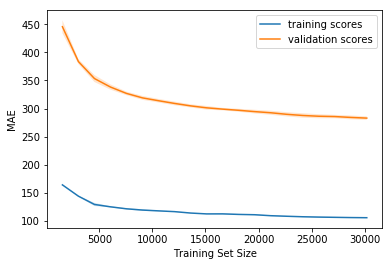

In [37]:
%%time
#We also construct a learning curve.
plot_learning_curve(model, X_train_transformed, y_train_log)

# boosting


Optimization of parameters

In [38]:
X_train_boosting, X_valid_boosting, y_train_boosting, y_valid_boosting = train_test_split(
    X_train_transformed, y_train_log, test_size=0.3, random_state=4444)

In [39]:
def score(params):
    from sklearn.metrics import log_loss
    print("Training with params:")
    print(params)
    params['max_depth'] = int(params['max_depth'])
    dtrain = xgb.DMatrix(X_train_boosting, label=y_train_boosting)
    dvalid = xgb.DMatrix(X_valid_boosting, label=y_valid_boosting)
    model = xgb.train(params, dtrain, params['num_round'])
    predictions = model.predict(dvalid).reshape((X_valid_boosting.shape[0], 1))
    score = mean_absolute_error(np.expm1(y_valid_boosting), np.expm1(predictions))
   # score = mean_absolute_error(y_valid_boosting, predictions)
    print("\tScore {0}\n\n".format(score))
    return {'loss': score, 'status': STATUS_OK}

def optimize(trials):
    space = {
             'num_round': 200,
             'learning_rate': hp.quniform('eta', 0.05, 0.5, 0.005),
             'max_depth': hp.quniform('max_depth', 3, 14, 1),
             'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
             'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
             'gamma': hp.quniform('gamma', 0.5, 1, 0.01),
             'colsample_bytree': hp.quniform('colsample_bytree', 0.4, 1, 0.05),
             'eval_metric': 'mae',
             'objective': 'reg:linear',
             'nthread' : 4,
             'silent' : 1,
             'seed': 4444
             }
    
    best = fmin(score, space, algo=tpe.suggest,trials=trials, max_evals=100)
    return best

code from

https://www.programcreek.com/python/example/98788/hyperopt.Trials

more on Parameter tuning wth Hyperopt 

https://districtdatalabs.silvrback.com/parameter-tuning-with-hyperopt

# parameter tuning. 
There are two common methods of parameter tuning: grid search and random search. Each have their pros and cons. Grid search is slow but effective at searching the whole search space, while random search is fast, but could miss important points in the search space. Luckily, a third option exists: Bayesian optimization. In this post, we will focus on one implementation of Bayesian optimization, a Python module called hyperopt.

Using Bayesian optimization for parameter tuning allows us to obtain the best parameters for a given model, e.g., logistic regression. This also allows us to perform optimal model selection. Typically, a machine learning engineer or data scientist will perform some form of manual parameter tuning (grid search or random search) for a few models - like decision tree, support vector machine, and k nearest neighbors - then compare the accuracy scores and select the best one for use. This method has the possibility of comparing sub-optimal models. Maybe the data scientist found the optimal parameters for the decision tree, but missed the optimal parameters for SVM. This means their model comparison was flawed. K nearest neighbors may beat SVM every time if the SVM parameters are poorly tuned. Bayesian optimization allow the data scientist to find the best parameters for all models, and therefore compare the best models. This results in better model selection, because you are comparing the best k nearest neighbors to the best decision tree. Only in this way can you do model selection with high confidence, assured that the actual best model is selected and used.

In [40]:
%%time

trials = Trials()
best_params = optimize(trials)

Training with params:
{'colsample_bytree': 0.6000000000000001, 'eval_metric': 'mae', 'gamma': 0.53, 'learning_rate': 0.22, 'max_depth': 4.0, 'min_child_weight': 6.0, 'nthread': 4, 'num_round': 200, 'objective': 'reg:linear', 'seed': 4444, 'silent': 1, 'subsample': 0.65}
	Score 318.24255158268124


Training with params:
{'colsample_bytree': 0.4, 'eval_metric': 'mae', 'gamma': 0.89, 'learning_rate': 0.23500000000000001, 'max_depth': 5.0, 'min_child_weight': 10.0, 'nthread': 4, 'num_round': 200, 'objective': 'reg:linear', 'seed': 4444, 'silent': 1, 'subsample': 0.75}
	Score 331.28510446332945


Training with params:
{'colsample_bytree': 0.75, 'eval_metric': 'mae', 'gamma': 0.54, 'learning_rate': 0.12, 'max_depth': 12.0, 'min_child_weight': 5.0, 'nthread': 4, 'num_round': 200, 'objective': 'reg:linear', 'seed': 4444, 'silent': 1, 'subsample': 0.75}
	Score 301.47681352108884


Training with params:
{'colsample_bytree': 0.7000000000000001, 'eval_metric': 'mae', 'gamma': 0.6900000000000001, '

	Score 313.9539809792729


Training with params:
{'colsample_bytree': 0.6000000000000001, 'eval_metric': 'mae', 'gamma': 0.55, 'learning_rate': 0.355, 'max_depth': 13.0, 'min_child_weight': 6.0, 'nthread': 4, 'num_round': 200, 'objective': 'reg:linear', 'seed': 4444, 'silent': 1, 'subsample': 0.65}
	Score 305.24936476939143


Training with params:
{'colsample_bytree': 0.5, 'eval_metric': 'mae', 'gamma': 0.5, 'learning_rate': 0.355, 'max_depth': 12.0, 'min_child_weight': 6.0, 'nthread': 4, 'num_round': 200, 'objective': 'reg:linear', 'seed': 4444, 'silent': 1, 'subsample': 0.6000000000000001}
	Score 308.6670372203245


Training with params:
{'colsample_bytree': 0.65, 'eval_metric': 'mae', 'gamma': 0.55, 'learning_rate': 0.36, 'max_depth': 12.0, 'min_child_weight': 7.0, 'nthread': 4, 'num_round': 200, 'objective': 'reg:linear', 'seed': 4444, 'silent': 1, 'subsample': 0.55}
	Score 312.95519824485996


Training with params:
{'colsample_bytree': 0.6000000000000001, 'eval_metric': 'mae', 'ga

	Score 319.9746685809335


Training with params:
{'colsample_bytree': 0.9500000000000001, 'eval_metric': 'mae', 'gamma': 0.62, 'learning_rate': 0.245, 'max_depth': 7.0, 'min_child_weight': 6.0, 'nthread': 4, 'num_round': 200, 'objective': 'reg:linear', 'seed': 4444, 'silent': 1, 'subsample': 0.8}
	Score 310.07292416674943


Training with params:
{'colsample_bytree': 0.8, 'eval_metric': 'mae', 'gamma': 0.52, 'learning_rate': 0.145, 'max_depth': 11.0, 'min_child_weight': 2.0, 'nthread': 4, 'num_round': 200, 'objective': 'reg:linear', 'seed': 4444, 'silent': 1, 'subsample': 0.7000000000000001}
	Score 302.83260991748443


Training with params:
{'colsample_bytree': 0.8500000000000001, 'eval_metric': 'mae', 'gamma': 0.51, 'learning_rate': 0.14, 'max_depth': 13.0, 'min_child_weight': 2.0, 'nthread': 4, 'num_round': 200, 'objective': 'reg:linear', 'seed': 4444, 'silent': 1, 'subsample': 0.55}
	Score 303.78356562361205


Training with params:
{'colsample_bytree': 1.0, 'eval_metric': 'mae', 'gam

	Score 304.31996947358556


Training with params:
{'colsample_bytree': 0.9, 'eval_metric': 'mae', 'gamma': 0.8200000000000001, 'learning_rate': 0.17500000000000002, 'max_depth': 10.0, 'min_child_weight': 3.0, 'nthread': 4, 'num_round': 200, 'objective': 'reg:linear', 'seed': 4444, 'silent': 1, 'subsample': 0.9500000000000001}
	Score 313.7565080082349


Training with params:
{'colsample_bytree': 0.9500000000000001, 'eval_metric': 'mae', 'gamma': 0.89, 'learning_rate': 0.1, 'max_depth': 11.0, 'min_child_weight': 4.0, 'nthread': 4, 'num_round': 200, 'objective': 'reg:linear', 'seed': 4444, 'silent': 1, 'subsample': 0.9}
	Score 313.26356620034255


Training with params:
{'colsample_bytree': 0.9, 'eval_metric': 'mae', 'gamma': 0.65, 'learning_rate': 0.215, 'max_depth': 12.0, 'min_child_weight': 3.0, 'nthread': 4, 'num_round': 200, 'objective': 'reg:linear', 'seed': 4444, 'silent': 1, 'subsample': 1.0}
	Score 313.09037105646513


Training with params:
{'colsample_bytree': 0.9500000000000001,

In [41]:
best_params



{'colsample_bytree': 0.9,
 'eta': 0.05,
 'gamma': 0.5,
 'max_depth': 12.0,
 'min_child_weight': 3.0,
 'subsample': 1.0}

In [42]:
params = {
             'num_round': 200,
             'colsample_bytree': 0.65,
             'eta': 0.145,
             'gamma': 0.55,
             'max_depth': 10,
             'min_child_weight': 4.0,
             'subsample': 1.0,
             'eval_metric': 'mae',
             'objective': 'reg:linear',
             'nthread' : 4,
             'silent' : 1,
             'seed': 4444}

In [43]:
dtrain = xgb.DMatrix(X_train_transformed, label=y_train_log)
dvalid = xgb.DMatrix(X_test_transformed, label=y_test_log)
boosting_model = xgb.train(params, dtrain, params['num_round'])
predictions = boosting_model.predict(dvalid).reshape((X_test_transformed.shape[0], 1))
score = mean_absolute_error(y_test, np.expm1(predictions))
print('Boosting score: %f' % score)


Boosting score: 290.504359



We present the results of various models on the test sample. As previously stated, we use MAE as a metric.

In [44]:
pure_ridge = Ridge(random_state=4444, alpha=0.00001) #ridge regression on raw data
pure_ridge.fit(X_train_transformed, y_train_log)
pure_ridge_score = mean_absolute_error(y_test, np.expm1(pure_ridge.predict(X_test_transformed)))
print('Ridge regression score: %f' % pure_ridge_score)
poly_ridge = Ridge(random_state=4444, alpha=52.140083) #ridge regression with polynomial features  
poly_ridge.fit(X_train_transformed_add, y_train_log)
poly_ridge_score = mean_absolute_error(y_test, np.expm1(poly_ridge.predict(X_test_transformed_add)))
print('Ridge regression score with poly features: %f' % poly_ridge_score)
forest_score = mean_absolute_error(y_test, np.expm1(forest_model.predict(X_test_transformed)))
print('Random forest score: %f' % forest_score)
boosting_score = mean_absolute_error(y_test, np.expm1(boosting_model.predict(dvalid)))
print('XGBoost score: %f' % boosting_score)

Ridge regression score: 588.854813
Ridge regression score with poly features: 385.308688
Random forest score: 274.893815
XGBoost score: 290.504359



This data set was fairly clean, so the main emphasis was placed on using different models for their analysis. On the one hand, a random forest without any adjustment of the hyperparameters showed the best result. On the other hand, with more time in our hands optimizing gradient boosting would give us better result than a random forest. It is also worth noting the linear model: after adding polynomial features, it showed a very good result (when compared with a model without additional features. But the complexity was lacking. If suddenly someone in life will have to evaluate diamonds, you can safely use the proposed random forest model. On average, you will lose $ 275 per diamond 



In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score
from sklearn.metrics import make_scorer

In [50]:
def metrics(y_true,y_pred):
    ## objective: printing the R^2, mean squared error and mean absolute error 
    ## input: the actual target variable Series and the predicted target variable Series 
    print("R2 score:",r2_score(y_true,y_pred))
    print('mean squared error',mean_squared_error(y_true,y_pred))
    print("mean absolute error",mean_absolute_error(y_true,y_pred))

In [52]:
kn_model=KNeighborsRegressor(n_neighbors=3)
kn_model.fit(X_train_transformed_add,y_train)
pred=kn_model.predict(X_test_transformed_add)
print ('=========\nTest results')
metrics(y_test,pred)
print ('=========\nTrain results')
metrics(y_train,kn_model.predict(X_train_transformed_add))


Test results
R2 score: 0.9562740778611012
mean squared error 699424.3874812893
mean absolute error 411.84484818522634
Train results
R2 score: 0.9776961051577296
mean squared error 354206.051432809
mean absolute error 284.7619224182072


In [65]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(random_state = 42)
from pprint import pprint


In [66]:
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [67]:
from sklearn.model_selection import RandomizedSearchCV


In [76]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [77]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200]}


In [78]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [83]:
rf_random.fit(X_train_transformed, y_train_log)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [84]:
rf_random.best_params_

{'n_estimators': 157,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [95]:
forest_model = RandomForestRegressor(n_estimators=300, min_samples_split=5,
 min_samples_leaf = 1,
 max_features='auto',
 max_depth=110)
forest_model.fit(X_train_transformed, y_train_log)
forest_prediction = np.expm1(forest_model.predict(X_test_transformed))
score = mean_absolute_error(y_test, forest_prediction)
print('Random forest score: %f' % score)

Random forest score: 273.461121
